In [2]:
import sys
sys.path.append("/Users/marchan/Documents/GitHub/PORTFOLIO_PROJECT/LIBRARIES/ThinkDSP/code")

In [3]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2 

import numpy as np

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

PI2 = np.pi * 2

%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import thinkdsp
import thinkplot
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#amplitude_data()
X_normal = thinkdsp.read_wave('/Users/marchan/Documents/GitHub/PORTFOLIO_PROJECT/LIBRARIES/pyAudioAnalysis/Atraining_normal/201101070538.wav')
X_murmur = thinkdsp.read_wave('/Users/marchan/Documents/GitHub/PORTFOLIO_PROJECT/LIBRARIES/pyAudioAnalysis/Atraining_murmur/201101051104.wav')
X_extrahls = thinkdsp.read_wave('/Users/marchan/Documents/GitHub/PORTFOLIO_PROJECT/LIBRARIES/pyAudioAnalysis/Atraining_extrahls/201101070953.wav')

## Plotting waves with different phase offsets.

No handles with labels found to put in legend.


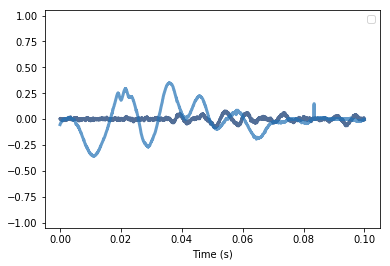

In [18]:
thinkplot.preplot(3)
X_normal.segment(duration=0.1).plot()
X_murmur.segment(duration=0.1).plot()
#X_extrahls.segment(duration=0.1).plot()

thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

In [19]:
print(np.corrcoef(X_murmur.ys, X_normal.ys))

[[1.         0.00112801]
 [0.00112801 1.        ]]


In [24]:
print(X_murmur.corr(X_normal))
print(X_murmur.corr(X_extrahls))
print(X_normal.corr(X_extrahls))

0.0011280113734386584
0.004024887426165412
0.01014276648630016


To investigate the relationship between phase offset and correlation, I'll make an interactive function that computes correlation for each offset:

In [31]:
def compute_corr(offset):
    
    thinkplot.preplot(2)
    X_murmur.segment(duration=0.01).plot()
    X_extrahls.segment(duration=0.01).plot()
    
    corr = X_murmur.corr(X_extrahls)
    print('corr =', corr)
    
    thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

In [32]:
slider = widgets.FloatSlider(min=0, max=PI2, value=1)
interact(compute_corr, offset=slider);

interactive(children=(FloatSlider(value=1.0, description='offset', max=6.283185307179586), Output()), _dom_cla…

### Finally, we can plot correlation as a function of offset:

# trying with a random wave

def make_sine(offset):
    signal = thinkdsp.SinSignal(freq=440, offset=offset)
    X_normal_offset2 = signal.make_wave(duration=0.5, framerate=10000)
    return X_normal_offset2

X_normal_offset2 = make_sine(offset)

No handles with labels found to put in legend.


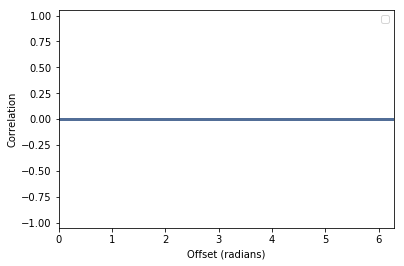

In [49]:
offsets = np.linspace(0, PI2, 101)



corrs = []
for offset in offsets:
    corr = np.corrcoef(X_normal.ys, X_murmur.ys)[0, 1]
    corrs.append(corr)
    
thinkplot.plot(offsets, corrs)
thinkplot.config(xlabel='Offset (radians)',
                 ylabel='Correlation', 
                 axis=[0, PI2, -1.05, 1.05])

Next we'll compute serial correlations for different kinds of noise

In [51]:
def serial_corr(X_murmur, lag=1):
    N = len(X_murmur)
    y1 = X_murmur.ys[lag:]
    y2 = X_murmur.ys[:N-lag]
    corr = np.corrcoef(y1, y2, ddof=0)[0, 1]
    return corr

No handles with labels found to put in legend.


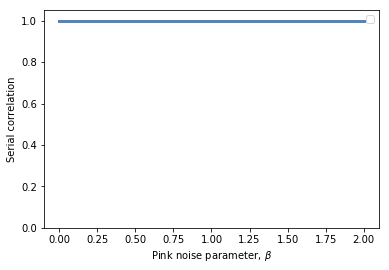

In [52]:
np.random.seed(19)

betas = np.linspace(0, 2, 21)
corrs = []

for beta in betas:
    signal = thinkdsp.PinkNoise(beta=beta)
    #wave = signal.make_wave(duration=1.0, framerate=11025)
    corr = serial_corr(X_murmur)
    corrs.append(corr)
    
thinkplot.preplot(1)
thinkplot.plot(betas, corrs)
thinkplot.config(xlabel=r'Pink noise parameter, $\beta$',
                 ylabel='Serial correlation', 
                 ylim=[0, 1.05])

No handles with labels found to put in legend.


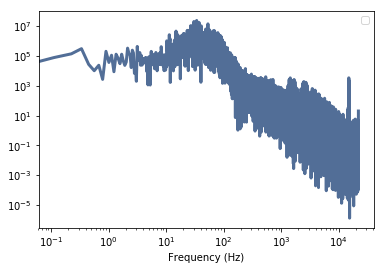

In [54]:
#the power of the spectrum

spectrum = X_murmur.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')



No handles with labels found to put in legend.


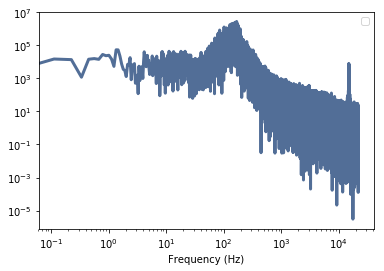

In [55]:

spectrum = X_normal.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')

No handles with labels found to put in legend.


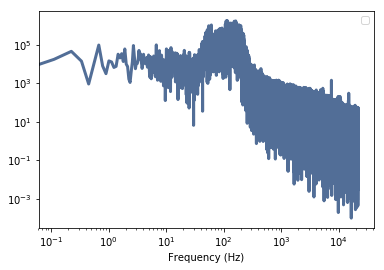

In [56]:
spectrum = X_extrahls.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')

To track de Fundamental Frecuency!!

No handles with labels found to put in legend.


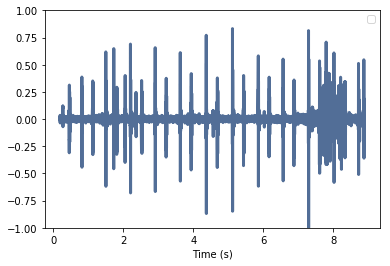

In [65]:
duration = 10000000000000000
segment = X_normal.segment(start=0.2, duration=duration)
segment.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1, 1])